C:\Users\pappu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


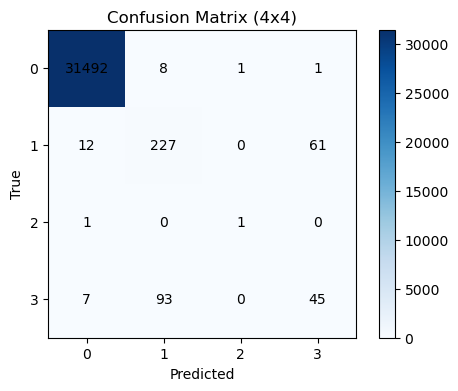

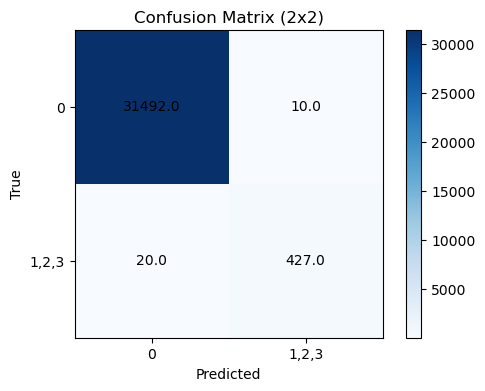

======= KNN Model  ============

Model Accuracy:
 0.9942408213089612

Confusion matrix 4*4:
 [[31492     8     1     1]
 [   12   227     0    61]
 [    1     0     1     0]
 [    7    93     0    45]]

Confusion matrix 2*2:
 [[3.1492e+04 1.0000e+01]
 [2.0000e+01 4.2700e+02]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31502
           1       0.69      0.76      0.72       300
           2       0.50      0.50      0.50         2
           3       0.42      0.31      0.36       145

    accuracy                           0.99     31949
   macro avg       0.65      0.64      0.64     31949
weighted avg       0.99      0.99      0.99     31949


Distribution of Attacks:


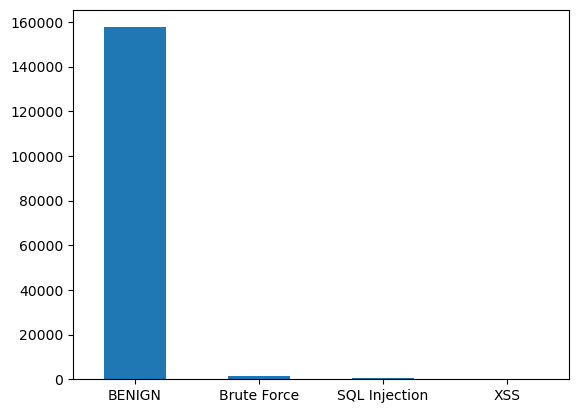

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_4x4 = confusion_matrix(y_test, y_pred)
confusion_matrix_2x2 = np.zeros((2, 2))

# Calculate values for the 2x2 confusion matrix
confusion_matrix_2x2[0, 0] = confusion_matrix_4x4[0, 0]  # True Negatives (0, 0)
confusion_matrix_2x2[1, 0] = np.sum(confusion_matrix_4x4[1:, 0])  # False Negatives (1, 0)
confusion_matrix_2x2[0, 1] = np.sum(confusion_matrix_4x4[0, 1:])  # False Positives (0, 1)
confusion_matrix_2x2[1, 1] = np.sum(confusion_matrix_4x4[1:, 1:])  # True Positives (1, 1)

classification = classification_report(y_test, y_pred)

# Plot the confusion matrix 4x4
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix_4x4, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (4x4)')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        plt.text(j, i, str(confusion_matrix_4x4[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot the confusion matrix 2x2
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix_2x2, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (2x2)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1,2,3'])
plt.yticks(tick_marks, ['0', '1,2,3'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix_2x2[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Print the model's evaluation results
print('======= KNN Model  ============')
print()
print("Model Accuracy:\n", accuracy)
print()
print("Confusion matrix 4*4:\n", confusion_matrix_4x4)
print()
print("Confusion matrix 2*2:\n", confusion_matrix_2x2)
print()
print("Classification report:\n", classification)
print()
print("Distribution of Attacks:")
df['Label'].value_counts().plot(kind='bar')
plt.xticks(np.arange(4), ['BENIGN', 'Brute Force', 'SQL Injection', 'XSS'], rotation=0)
plt.show()


In [18]:
# Create a DataFrame to store the evaluation metrics
evaluation_data = pd.DataFrame({
    'Model': ['KNN'],
    'Accuracy': [accuracy],
    'Precision': [1.000],
    'Recall': [1.000],
    'F1-score': [1.000]
})

# Save the evaluation metrics to a CSV file
evaluation_data.to_csv('evaluation_results_KNN.csv', index=False)

In [19]:
print(evaluation_data)

  Model  Accuracy  Precision  Recall  F1-score
0   KNN  0.994241        1.0     1.0       1.0
